In [3]:
import organoid_prediction_python as opp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

translation_frame = pd.read_csv("translation_dataframe_timepoints.csv")
name_mapping = {key:new_key for key,new_key in zip(translation_frame["original_names"],translation_frame["plot_names"])}

home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"
table_location = home_directory + "tabular_data"

translation_frame = pd.read_csv("translation_dataframe_timepoints.csv")
name_mapping = {key:new_key for key,new_key in zip(translation_frame["original_names"],translation_frame["plot_names"])}

data = pd.read_csv(f"{table_location}/All_Samples_Feature_Space_All_Features_48h,72h,96h_Normalised_per_Timepoint.csv")

data_raw = pd.read_csv(f"{table_location}/All_Samples_Feature_Space_All_Features_48h,72h,96h.csv")

data = data.drop("096h_raw_CH_AreaShape_Bra_AreaFraction",axis=1).merge(data_raw[["Run","Plate","ID","096h_raw_CH_AreaShape_Bra_AreaFraction"]],on=["Run","Plate","ID"])

annotations = table_location + "/annotations_with_indices.csv"
annotation_df = pd.read_csv(annotations)
mapping = {"Real_Run":"RR", "Trial_Run":"TR"}
annotation_df["Run"] = [mapping[value] for value in annotation_df["Run"].to_numpy()]
no_na_annot = annotation_df[annotation_df["Morph_Class"]!="NA_NA"]

data_annotated = data.set_index(["Run","Plate","ID"]).merge(no_na_annot,on=["Run","Plate","ID"]).rename(columns = name_mapping)
data_annotated

,Run,Plate,ID,048h-[Area]-BF,048h-[Aspect Ratio]-BF,048h-[Axis Major Length]-BF,048h-[Axis Minor Length]-BF,048h-[Eccentricity]-BF,048h-[Feret Diameter Max]-BF,048h-[Perimeter]-BF,...,096h-[str Moments Hu 5]-BF,096h-[str Moments Hu 6]-BF,096h-[str Orientation]-BF,096h-[str Perimeter]-BF,096h-[str Major Axis Polarisation]-TmCH,096h-[str Minor Axis Polarisation]-TmCH,096h-[Area Fraction]-TmCH,Axes,Morph,Morph_Class
0,RR,1,A1,0.754091,-0.889636,0.132588,1.204628,-1.000051,0.007074,0.615519,...,-0.108285,-0.018937,0.218694,0.485603,-0.237483,0.204173,0.881780,single,good,single_good
1,RR,1,A2,-0.783470,-1.252670,-1.238409,0.003129,-1.752936,-1.131530,-0.724230,...,-0.108023,0.017986,-1.310831,-0.276812,-0.930821,1.071650,0.811699,single,bad,single_bad
2,RR,1,A3,1.636441,-0.184192,1.186196,1.565451,-0.008740,1.127225,1.795347,...,-0.108504,-0.019001,-0.638784,0.014028,0.406917,-0.068697,0.854586,single,bad,single_bad
3,RR,1,A4,-0.525754,-0.513477,-0.672134,-0.202863,-0.422446,-0.849309,-0.402853,...,-0.013521,0.038021,0.362758,0.652506,0.992505,-0.551399,0.835696,single,good,single_good
4,RR,1,A5,0.537872,-0.248943,0.294790,0.612413,-0.084969,0.059492,0.498737,...,-0.113141,-0.013480,-0.324894,-1.090064,0.285818,-0.643907,0.375567,single,bad,single_bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,TR,2,H8,-0.342295,-0.103644,-0.319022,-0.266071,0.083062,-0.511010,-0.233997,...,-0.095753,0.232280,-0.531978,0.936472,-1.056426,0.770934,0.940896,unclassified,unclassified,unclassified_unclassified
434,TR,2,H9,-0.925432,1.281638,-0.116354,-1.536867,1.304509,-0.330223,-1.009869,...,-0.137911,0.247706,0.371618,1.965908,0.143556,0.712064,0.873950,single,good,single_good
435,TR,2,H10,-1.873304,-1.279234,-2.131125,-1.049808,-1.821515,-2.016265,-1.929328,...,-0.115499,0.052699,0.177291,1.923294,-1.128242,-0.816051,0.940728,double,unclassified,double_unclassified
436,TR,2,H11,-2.408392,-0.915375,-2.411391,-1.803167,-1.045366,-2.414625,-2.306480,...,-0.309307,0.338411,-0.341009,1.652660,-0.982778,1.840169,0.958505,single,good,single_good


In [4]:
features_to_plot = [
    '072h_raw_CH__bf_mask_Intensity_MeanIntensity',
    '072h_raw_CH__bf_mask_RadialDistribution_MeanFrac_2of9',
    '096h_raw_CH_AreaShape_Bra_AreaFraction',
    '096h_raw_CH_bra_mask_Intensity_MeanIntensity',
]
features_to_plot = [name_mapping[feat] for feat in features_to_plot]
features_to_plot

['072h-[Mean Intensity]-TmCH(BF)',
 '072h-[Radial Distribution Mean 2of9]-TmCH(BF)',
 '096h-[Area Fraction]-TmCH',
 '096h-[Mean Intensity]-TmCH(mCH)']

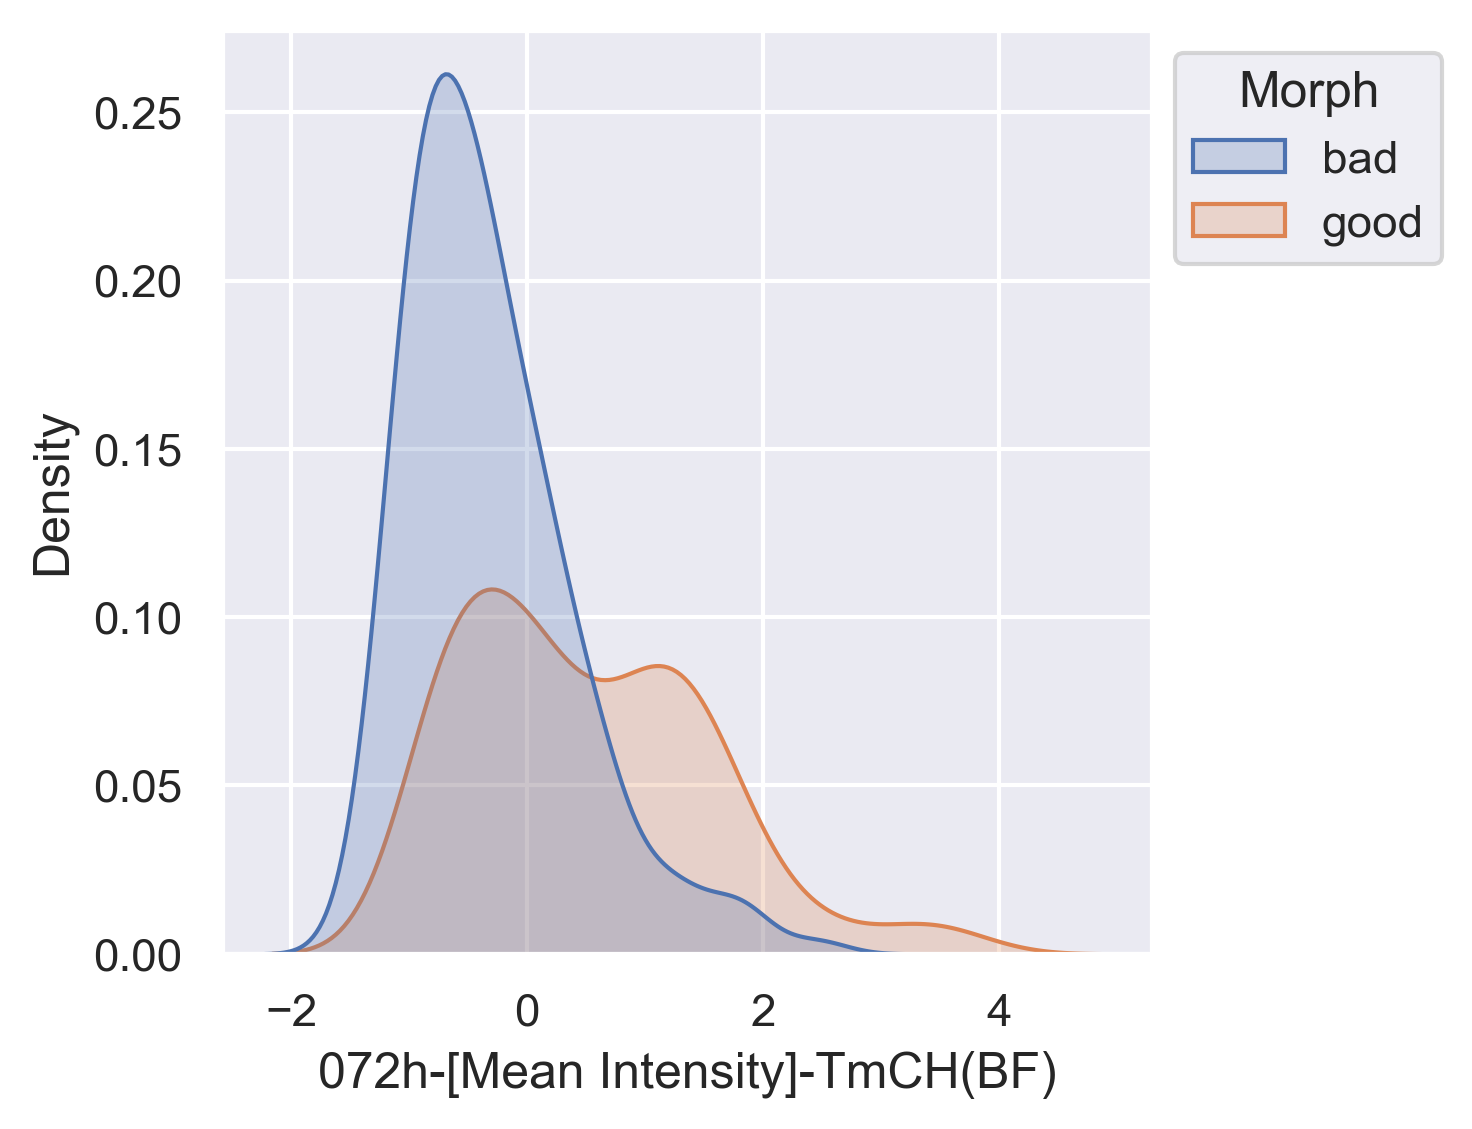

In [8]:
sns.set()

fig,ax = plt.subplots(1,1,figsize = (4,4))
sns.kdeplot(data=data_annotated, x=features_to_plot[0], hue="Morph", multiple='layer', fill=True,hue_order=["bad","good"],ax=ax)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.savefig(f"{out_PLSR}/72h Mean Intensity w 72h sequenced samples.pdf", format="pdf", bbox_inches="tight")

In [16]:
data_annotated[data_annotated[features_to_plot[0]] < -1][["Run","Plate","ID",features_to_plot[0],"Morph"]]

,Run,Plate,ID,072h-[Mean Intensity]-TmCH(BF),Morph
4,RR,1,A5,-1.477364,bad
31,RR,1,C9,-1.173149,bad
39,RR,1,D5,-1.046843,bad
49,RR,1,E3,-1.056037,unclassified
50,RR,1,E4,-1.088965,bad
54,RR,1,E8,-1.380085,bad
56,RR,1,E10,-1.010018,unclassified
63,RR,1,F5,-1.034548,bad
64,RR,1,F6,-1.150549,bad
123,RR,4,C5,-1.270337,bad


In [19]:
data_annotated[(data_annotated[features_to_plot[0]] < 0)&(data_annotated[features_to_plot[0]]>-1)&(data_annotated["Morph"]=="good")][["Run","Plate","ID",features_to_plot[0],"Morph"]]

,Run,Plate,ID,072h-[Mean Intensity]-TmCH(BF),Morph
13,RR,1,B2,-0.040716,good
19,RR,1,B9,-0.328384,good
26,RR,1,C4,-0.695781,good
28,RR,1,C6,-0.798551,good
61,RR,1,F3,-0.757961,good
76,RR,1,G6,-0.090652,good
77,RR,1,G7,-0.024418,good
78,RR,1,G8,-0.908023,good
84,RR,1,H2,-0.062718,good
139,RR,4,D9,-0.859415,good


In [20]:
data_annotated[(data_annotated[features_to_plot[0]] > 1)&(data_annotated[features_to_plot[0]] < 2)&(data_annotated["Morph"]=="good")][["Run","Plate","ID",features_to_plot[0],"Morph"]]

,Run,Plate,ID,072h-[Mean Intensity]-TmCH(BF),Morph
12,RR,1,B1,1.281373,good
22,RR,1,B12,1.860674,good
70,RR,1,F12,1.371519,good
82,RR,1,G12,1.714178,good
130,RR,4,C12,1.354605,good
154,RR,4,E12,1.108734,good
167,RR,4,G1,1.516612,good
180,RR,4,H2,1.676308,good
184,RR,4,H6,1.244418,good
185,RR,4,H7,1.221660,good


In [21]:
IDs_bad_peak = [
    "RR_1_D5",
    "RR_1_E4",
]

IDs_good_low_val_peak = [
    "RR_1_H2"
    "RR_4_F2"
]

IDs_good_high_val_peak = [
    "RR_1_B1"
    "RR_6_H3"
]